## 7-1. Quantum Phase Estimation Algorithm in Detail: Application to Hydrogen Molecule as an Example
In this section, we review the Quantum Phase Estimation (QPE) algorithm and try to find the eigenvalues ​​of the Hamiltonian of a quantum many-body system (hydrogen molecule) using QPE. In the process, we will learn in detail the flow and techniques for applying QPE to real problems.

### Review of Phase Estimation
As we have already learned in [2-4. Phase estimation algorithm (introductory)](2.4_phase_estimation_beginner.ipynb), given a unitary matrix $U$, QPE extracts its eigenvalues ​​$e^{i \lambda}$ as bit strings.
By using QPE as a subroutine, it is expected that many problems such as prime factorization and quantum many-body energy calculation (which can be reduced to the eigenvalue problem of unitary matrices) can be solved much faster than on classical computers.

Let us recall the transformation of QPE specifically. Let $| u_i \rangle$ be the eigenvector corresponding to the $i$-th eigenvalue $e^{i \lambda_i}$ of $U$ ($U | u_i \rangle = e^{i \lambda_i} | u_i \rangle$). At this time, using the control unitary operation $\Lambda (U)$ and the quantum Fourier transform, the QPE realizes the following transform.

$$
| u_i \rangle | 0 \rangle{}^{\otimes{t}} \xrightarrow{\text{QPE}} | u_i \rangle | \tilde{\lambda_i} \rangle.
$$

where $| 0 \rangle{}^{\otimes{t}}$ are $t$ auxiliary qubits and $\tilde{\lambda_i}=j_1j_2 \ldots j_t$ is a bit string that is binary expression of $\lambda_i$ up to the $t$th digit

$$
\frac{\lambda_i}{2 \pi} = \frac{j_1}{2} + \frac{j_2}{2^2} + \ldots + \frac{j_t}{2^t} = 0.j_1 j_2 \ldots j_t
$$ 

(The $(t+1)$ th digit and after are omitted.)

To run this QPE on practical problems, it is believed that a quantum computer with error correction is required (long-term algorithm). The main reason is

- number of auxiliary bits
- complexity of control unitary gate $\Lambda (U^{2^{k-1}})$ ($k =1, ..., t$)

First, regarding the number of ancillary bits, for example, 50 or more ancillary bits are required to obtain $\lambda_i$ with the precision of double-precision real numbers used in modern classical computers.
And with such a large number of ancillary bits (i.e. large $t$ ), the control unitary gate $\Lambda (U^{2^{k-1}})$ ($k =1, ..., t$) for very large powers of $U$.
The difficulty of preparing such a control gate depends on what kind of matrix you consider for $U$ , but in general it is not easy.

As we will see later, in the case of the eigenvalue problem of the Hermitian matrix $H$, which is one of the most promising applications of QPE, $U$ is the time evolution operator by $H$. That is, $ U = e^{-iH\tau}$ (where $\tau$ is a constant). Therefore, the large power of $U$ means simulating development of $H$ for a long time (exponential to the reciprocal of precision) which is very difficult.

### Iterative Quantum Phase Estimation

In fact, if we're only interested in the eigenvalues ​​of $U$ and don't need the eigenstates, we can reduce the QPE ancillary bits. This is called Iterative Quantum Phase Estimation (IQPE), [PhysRevA.76.030306](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.76.030306), and is equivalent to the method introduced in the section "Introduction: Improving the Hadamard test" of [chapter 2-4](2.4_phase_estimation_beginner.ipynb), we will describe it here again.

IQPE is a method of deterministically obtaining bit strings of binary expansion of eigenvalues ​​for each digit. Only one auxiliary bit is required, and one digit value ($j_k$) of the eigenvalue binary decimal representation $0.j_1...j_t$ is obtained for each iteration.
The steps are ($k = t, t-1, \ldots, 1$):

#### $k = t$
1. Put a Hadamard gate on the auxiliary bit

$$
| 0 \rangle | u_i \rangle \xrightarrow{H} \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) | u_i \rangle  
$$


2. Multiply the ancillary bits by $\Lambda (U^{2^{t-1}})$

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) | u_i \rangle  \xrightarrow{\Lambda (U^{2^{t-1}})} \frac{1}{\sqrt{2}} \left(| 0 \rangle + e^{i \pi j_t} | 1 \rangle \right) | u_i \rangle 
$$


3. Apply a Hadamard gate to the auxiliary bit and measure

$$
\frac{1}{\sqrt{2}} \left(| 0 \rangle + e^{i \pi j_t} | 1 \rangle \right) | u_i \rangle  \xrightarrow{H} \frac{1}{2} [ (1 + e^{i \pi j_t})| 0 \rangle + (1 - e^{i \pi j_t}) | 1 \rangle]   |u_i \rangle =  | j_t \rangle | u_i \rangle  \xrightarrow{\textrm{Measure}} j_t
$$

4. Reflect the measurement result $j_t$ to the accumulation phase $\Phi(t)$: $\Phi(t)$: $\Phi(t) = \pi \cdot \frac{j_t}{2} = \pi 0. j_t$

#### $k = t-1, t-2, \ldots, 1$
1. Apply a Hadamard gate to the auxiliary bit

$$
| 0 \rangle | u_i \rangle \xrightarrow{H} \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) | u_i \rangle  
$$


2. Apply Z rotation gate $R_Z ( \Phi(k+1) )$ to the auxiliary bit (where $R_Z(\theta)=e^{i\theta/2 Z}, \Phi(k+1) = \ pi 0.j_{k+1} j_{k+2} \ldots j_{t}$)

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) | u_i \rangle \xrightarrow{R_Z} \frac{e^{i\Phi(k+1)/2}}{\sqrt{2}} (| 0 \rangle + e^{- i \pi 0.j_{k+1} j_{k+2} \ldots j_{t}} | 1 \rangle) | u_i \rangle 
$$


3. Multiply the ancillary bits by $\Lambda (U^{2^{k-1}})$

$$
\frac{e^{i\Phi(k+1)/2}}{\sqrt{2}} (| 0 \rangle + e^{- i \pi 0.j_{k+1} j_{k+2} \ldots j_{t}} | 1 \rangle) | u_i \rangle \xrightarrow{\Lambda (U^{2^{k-1}})} \frac{e^{i\Phi(k+1)/2}}{\sqrt{2}} (| 0 \rangle + e^{i \pi j_k} | 1 \rangle) | u_i \rangle 
$$

4. Apply a Hadamard gate to the auxiliary bit and measure

$$
\frac{e^{i\Phi(k+1)/2}}{\sqrt{2}} (| 0 \rangle + e^{i \pi j_k} | 1 \rangle) | u_i \rangle  \xrightarrow{H} \frac{e^{i\Phi(k+1)/2}}{2}  [(1 + e^{i \pi j_k})| 0 \rangle + (1 - e^{i \pi j_k}) | 1 \rangle] | u_i \rangle = e^{i\Phi(k+1)/2} | j_k \rangle | u_i \rangle  \xrightarrow{\textrm{Measure}} j_k
$$


5. Refleat the measurement result $j_k$ to the accumulation phase $\Phi(k)$:

$$
\Phi(k) = \frac{\Phi(k+1)}{2} + \pi \cdot \frac{j_k}{2} = \pi 0.j_{k} j_{k+1} \ldots j_{t}
$$

#### After measuring all $j_k$ ($k = t, t-1, \ldots, 1$)
We get the desired phase.

$$
\lambda_i = 2 \Phi(1) = 2 \pi 0.j_1.j_2 \ldots j_{t}
$$

### Example: Calculation of the ground state energy of the hydrogen molecular Hamiltonian using the quantum phase estimation algorithm

Let's calculate the ground state energy of the hydrogen molecule using the above iterative phase estimation algorithm (the following content is based on the paper [1]).

As we learned in [Section 4-1](4.1_quantum_simulation.ipynb) and [Section 6-1](6.1_openfermion_basics.ipynb), the ground state energy of the hydrogen molecule is the smallest eigenvalue of Hamiltonian $H$.
In QPE and IQPE, the eigenvalue problem of Hamiltonian $H$ is solved by **finding the eigenvalues ​​of its time evolution operator** $U = e^{−iH \tau}$.

Here, $E_{\text{min}}$ and $E_{\text{max}}$ are the smallest and largest eigenvalues. $\tau$ is some constant and is set so that $[ E_{\text{min}}, E_{\text{max}}]$ fit in  $[0, 2\pi]$. (add a constant shift if necessary). Although in QPE and IQPE, the phase of the eigenvalue of $U$ has $2\pi$ ambiguity, the eigenvalues ​​of $H$ can be uniquely restored from the eigenvalues ​​of $U$ this way.

The steps required to calculate the basis energy are:

0. (Reduce Hamiltonian size using symmetry etc.)
1. Accurate approximation of Hamiltonian time evolution operator $U=e^{-iH\tau}$
2. Decompose the control time evolution operator into a gate set that can be easily executed on a quantum computer and implement it
3. Prepare an initial state with sufficient overlap with the ground state
4. Measuring energy eigenvalues ​​with IQPE

A detailed explanation of the method and an implementation example are given below.

#### 0. (Reduce Hamiltonian size using symmetry etc.)

This step is necessary to reduce resources as much as possible when actually running IQPE on a simulator or on a real machine, and is not theoretically essential.
For details, refer to reference [1], but if we map the second quantized Hamiltonian of the hydrogen molecule (STO-6G basis) to the qubit system by the Bravyi-Kitaev transformation, we get a 4 qubit Hamiltonian = $16 \times 16$ matrix. However, if we partially diagonalize the Hamiltonian using the **symmetry of the Hamiltonian** (such as the law of conservation of the number of electrons), we can get the ground state with 2 qubits, and the Hamiltonian  has only 6 kinds of terms as follows.

$$
H = \sum_i g_i H_i = g_0 I + g_1 Z_0 + g_2 Z_1 + g_3 Z_0 Z_1 + g_4 Y_0 Y_1 + g_5 X_0 X_1
$$

where the coefficient $g_i$ is a real number and its value depends on the interatomic distance (arrangement) of hydrogen molecules.
Readers unfamiliar with chemistry should just understand that the above Hermitian matrix corresponding to the hydrogen molecule exists and that it is important to find the minimum eigenvalue of it.

For the interested readers, we present how to construct the reduced Hamiltonian from scratch. First, let's follow reference [1] and construct the full qubit Hamiltoinian with the Bravyi-Kitaev transformation. Please check out the QURI Parts tutorial page on [Fermion-Qubit mapping](https://quri-parts.qunasys.com/tutorials/quantum_chemistry/qubit_operator_mapping) for more details.

In [1]:
import numpy as np
from pyscf import gto, scf
from quri_parts.pyscf.mol import get_spin_mo_integrals_from_mole
from quri_parts.openfermion.mol import get_qubit_mapped_hamiltonian
from quri_parts.openfermion.transforms import bravyi_kitaev
from quri_parts.core.operator import commutator, zero

mol = gto.M(atom="H 0 0 0; H 0 0 0.7", basis="sto-6g")
mf = scf.RHF(mol).run(verbose=0)
full_space, spin_mo_eint = get_spin_mo_integrals_from_mole(mol, mf.mo_coeff)
qubit_hamiltonian, bk_op_mapper, bk_state_mapper = get_qubit_mapped_hamiltonian(full_space, spin_mo_eint, bravyi_kitaev)

for op, coeff in qubit_hamiltonian.items():
    print(f"{np.round(coeff, 5)} * {op}")

(0.17963+0j) * Z0
(-0.04975+0j) * I
(0.17963+0j) * Z0 Z1
(-0.24131+0j) * Z2
(-0.24131+0j) * Z1 Z2 Z3
(0.04482+0j) * Y0 Z1 Y2
(0.04482+0j) * X0 Z1 X2
(0.04482+0j) * X0 Z1 X2 Z3
(0.04482+0j) * Y0 Z1 Y2 Z3
(0.17059+0j) * Z1
(0.12303+0j) * Z0 Z2
(0.16786+0j) * Z0 Z1 Z2
(0.16786+0j) * Z0 Z1 Z2 Z3
(0.12303+0j) * Z0 Z2 Z3
(0.17671+0j) * Z1 Z3


Then we exploit some symmetry properties and reduce the Hamiltonian above. Note that we will be acting on the Hartree Fock state:

\begin{equation}
|\text{HF}\rangle = c_0^{\dagger}c_1^{\dagger}|0000\rangle,
\end{equation}

which takes the form

\begin{equation}
|\text{HF}\rangle_{\text{BK}} = |0001\rangle
\end{equation}

under the Bravi-Kitaev transform. In QURI Parts, we can show this by:

In [2]:
bk_state_mapper([0, 1])

ComputationalBasisState(qubit_count=4, bits=0b1, phase=0π/2)

As the Hamiltonian contains only Pauli operators $I$ and $Z$ on qubit 1 and 3, they act as identity operator on $|\text{HF}\rangle_{\text{BK}}$ on qubit 1 and 3. This means that we can remove these qubits from the Hamiltonian and relabel qubit 2 as qubit 1.

In [3]:
from quri_parts.core.operator import Operator, PAULI_IDENTITY, pauli_label

def get_reduced_operator(operator: Operator) -> Operator:
    """Compute reduced hamiltonian
    """

    reduced_op = Operator()
    pauli_map = {1: "X", 2: "Y", 3: "Z"}

    for op, coeff in operator.items():
        if op == PAULI_IDENTITY:
            reduced_op.add_term(PAULI_IDENTITY, coeff)
            continue
        
        new_str = []
        for idx, p in zip(*op.index_and_pauli_id_list):
            # Remove Z1 and Z3 from the Hamiltonian as they both act as identity
            # when acting on the Hartree-Fock state.
            if idx == 0:
                new_str.append(pauli_map[p] + "0")
            elif idx == 2:
                new_str.append(pauli_map[p] + "1")
            else:
                assert p == 3, "Symmetry is not satisfied."
        
        if len(new_str) == 0:
            reduced_op.add_term(PAULI_IDENTITY, coeff)
        else:
            reduced_op.add_term(pauli_label(" ".join(new_str)), coeff)
        
    return reduced_op

reduced_hamiltonian = get_reduced_operator(qubit_hamiltonian)

for op, coeff in reduced_hamiltonian.items():
    print(f"{np.round(coeff, 5)} * {op}")

(0.35925+0j) * Z0
(0.29755+0j) * I
(-0.48262+0j) * Z1
(0.08964+0j) * Y0 Y1
(0.08964+0j) * X0 X1
(0.58178+0j) * Z0 Z1


As there could be terms in the Hamiltonian that commutes with all the Pauli strings in the Hamiltonian, in this case $Z_0 Z_1$ and the identity operator, we can remove them from the Hamiltonian for further reducing the size of the Hamiltonian.

In [4]:
import numpy as np
from numpy.linalg import matrix_power, eig
from scipy.sparse.linalg import eigsh
from quri_parts.core.operator import Operator, pauli_label, get_sparse_matrix

def remove_all_commuting_terms(reduced_op: Operator) -> None:
    """Remove terms that commute with rest of the Hamiltonian
    """
    all_commuting = []
    for op1 in reduced_op:
        for op2 in reduced_op:
            if op2 in all_commuting:
                continue
            if commutator(Operator({op1: 1}), Operator({op2: 1})) != zero():
                break
        else:
            all_commuting.append(op1)

    [reduced_op.pop(op) for op in all_commuting]
    return

remove_all_commuting_terms(reduced_hamiltonian)

print("reduced_hamiltonian:\n")
for op, coeff in reduced_hamiltonian.items():
    print(f"{np.round(coeff, 5)} * {op}")

reduced_hamiltonian:

(0.35925+0j) * Z0
(-0.48262+0j) * Z1
(0.08964+0j) * Y0 Y1
(0.08964+0j) * X0 X1


We have finally obtained $H_{\textrm{eff}}$. Now, let's diagonalize it. The unit of energy used is [Hartree (Ha)](https://en.wikipedia.org/wiki/Hartree).

In [5]:
sparse_matrix = get_sparse_matrix(reduced_hamiltonian)
exact_eigenvalue, _ = eigsh(sparse_matrix, k=1, which='SA') ## only smallest eigenvalue and eigenvector are calculated

print('exact_eigenvalue: {:.10f} Ha'.format(exact_eigenvalue[0])) ## print eigenvalue up to 10 digits after decimal point

exact_eigenvalue: -0.8607485699 Ha


#### 1. Accurate approximation of Hamiltonian time evolution operator $U=e^{-iH\tau}$

To implement the control unitary operation $\Lambda (U^{2^k})$ used in IQPE, we first implement the time evolution operator $U = e^{−iH \tau}$ in a quantum circuit.
First, noting that the constant terms $g_0 I$ and $g_3 Z_0 Z_1$ commute with all other terms in the Hamiltonian, $U$ becomes

$$
e^{−iH \tau} = \exp \left[−i \tau \sum_i g_i H_i \right] = \exp[−i \tau g_0 I] \exp[−i \tau g_3 Z_0 Z_1] \exp[−i \tau H_{\textrm{eff}}]
$$

Here, $H_{\text{eff}}$ is 

$$
H_{\text{eff}} = g_1 Z_0 + g_2 Z_1 + g_4 Y_0 Y_1 + g_5 X_0 X_1
$$

Since the contributions of $g_0 I$ and $g_3 Z_0 Z_1$ to the eigenvalues ​​of the parts can easily be added later, in the following we calculate the eigenvalues ​​of $H_{\textrm{eff}}$ using IQPE of $U_{\text{eff}} := e^{−i H_{\text{eff}} \, \tau}$ .

Trotter decomposition of $U_{\text{eff}}$ is

$$
U_{\text{eff}} = \exp \left[−i \tau \sum_{i=1,2,4,5} g_i H_i \right] \approx U_{\text{Trot}}^{(N)} (\tau) := \left( \prod_{i=1,2,4,5} \exp[-i g_i H_i \tau/N] \right)^N
$$


Each term of the product appearing in $U_{\text{Trot}}^{(N)}$ is a multi-qubit Pauli rotation gate, that is, the exponential function of the Pauli matrix product $\exp(i\theta P)$ , making it easy to implement as a product of simple quantum gates. Now we have approximately implemented $U_{\textrm{eff}}$ on a quantum circuit.

Let's examine the errors in this approximation. When we do a rough analytical evaluation, we have [2]

$$
\left| U_{\textrm{eff}} - U_{\textrm{Trot}}^{(N)} (\tau) \right| \sim \frac{\tau^2}{2N} \sum_{i > j} | [H_i, H_j] |
$$

According to this expression, it is possible to take $N$ with a size of about $N \sim \tau^2/\epsilon$ for the desired precision $\epsilon$.


Since the system we are dealing with here is represented by a small matrix of $4 \times 4$, let's diagonalize $H_{\textrm{eff}}$ exactly and find its minimum eigenvalue $E_{\textrm{min}}$, and compare it with $\lambda_{\textrm{Trot}}$ of $e^{i \lambda_{\textrm{Trot}}\tau}$ which is the eigenvalue of $U_{\textrm{Trot}}^{(N)}$.

Next, we diagonize $U_{\textrm{Trot}}^{(N)}$. Later, we implement $U_{\textrm{Trot}}^{(N)}$ as a quantum circuit. Here, we calculate it by using the following formula which holds true when $H_i^2 = I$

$$
\left( \prod_{i=1,2,4,5} \exp[-i g_i H_i \tau/N] \right)^N = \left( \prod_{i=1,2,4,5} \left( \cos(g_i\tau/N) I -i \sin(g_i\tau/N) H_i \right) \right)^N
$$

Then, find the $\lambda_{\textrm{Trot}}$ of the eigenvalue $e^{-i \lambda_{\textrm{Trot}}\tau}$ of $U_{\textrm{Trot}}^{(N)}$ at $N = 1, 3, \ldots, 9$ and compare it with $E_{\textrm{min}}$.

In [6]:
from scipy.linalg import expm
def order_n_trotter_approx(t: float, n_trotter_steps: int) -> list[float]:
    """
    ordering: 'Z0', 'Y0 Y1', 'Z1', 'X0 X1'
    Returns:
        args: list of phases of each eigenvalue, exp(i*phase)
    """
    n_qubits = 2
    pauli_strings = [pauli_label('Z0'), pauli_label('Y0 Y1'), pauli_label('Z1'), pauli_label('X0 X1')]
    time_evolution_exponent = reduced_hamiltonian * t / n_trotter_steps
    
    matrix = np.eye(2**n_qubits)
    for h in pauli_strings:
        g = time_evolution_exponent[h]
        exponent = get_sparse_matrix(h, n_qubits).toarray()
        matrix = matrix @ expm(-1j * g * exponent)
    matrix = matrix_power(matrix, n_trotter_steps)  ## this is U_{trot}^{(N)}
    
    vals, _ = eig(matrix)  ## e^{i lambda_{trot} }
    args = np.angle(vals) ## returns value in [-pi, pi] -> we don't modify output since we know exact value is around -0.86
    return sorted(args) ## we return sorted values

tau = 0.640 ## taken from table 1 of paper [1]
print('N, E_trot, |exact_eig - E_trot|')
for n in range(1, 10, 2):
    phases = order_n_trotter_approx(tau, n)
    e_trotter = phases[0]/tau
    print( f"{n}, {e_trotter:.10f}, {abs(exact_eigenvalue[0] - e_trotter):.3e}" ) 

N, E_trot, |exact_eig - E_trot|
1, -0.8602638575, 4.847e-04
3, -0.8606950998, 5.347e-05
5, -0.8607293316, 1.924e-05
7, -0.8607387560, 9.814e-06
9, -0.8607426335, 5.936e-06


#### 2. Decomposition of the control time evolution operator into a set of gates that can be easily executed on a quantum computer and implementation.
To run the controlled time evolution operator $\Lambda \left( \left( U_{\textrm{Trot}}^{(N)} \right)^{2^k} \right)$ on a quantum computer, we need to decompose this into simple quantum gates.
In this example, we need  to decompose the following controlled rotation gate included in $U_{\textrm{Trot}}^{(N)}$.

- $\Lambda(R_Z(\theta))$
- $\Lambda(R_{XX}(\theta))$
- $\Lambda(R_{YY}(\theta))$ 

$R_Z(\theta) = e^{i\theta/2 Z_x}$ is the $Z$ direction rotation gate acting on the $x=0,1$ th qubit, $R_{XX}(\theta) = e^{i\theta/2 X_0 X_1}, R_{YY}(\theta) = e^{i\theta/2 Y_0 Y_1}$ is also a rotation gate.

First, $\Lambda(R_Z(\theta))$ is a gate that, when multiplied by control bit $| c \rangle$ and target bit $| t \rangle$, satisfies $(c=0,1)$ 

$$
\Lambda(R_Z(\theta)) | c \rangle | t \rangle = | c \rangle (R_Z(\theta))^c | t \rangle
$$

Note that $\textrm{CNOT} | c \rangle | t \rangle = | c \rangle X^c | t \rangle$、 $XZX = -Z$ holds, the formula can be transformed as follows

$$
\textrm{CNOT} \left(I \otimes R_Z(-\theta/2) \right) \textrm{CNOT} \left(I \otimes R_Z(\theta/2) \right) | c \rangle | t \rangle
= | c \rangle　X^c　R_Z(-\theta/2) X^c R_Z(\theta/2) | t \rangle
= | c \rangle \left(R_Z(\theta)\right)^c | t \rangle
$$

Therefore,

$$
\Lambda(R_Z(\theta)) = \textrm{CNOT} \left(I \otimes R_Z(-\theta/2) \right) \textrm{CNOT} \left(I \otimes R_Z(\theta/2) \right)
$$

In other words, the controlled rotation gate $\Lambda(R_Z(\theta))$ could be implemented using the basic gates of the CNOT gate and the $Z$ rotation gate.

Moreover,

$$
\textrm{CNOT}_{0,1} \left(I_0 \otimes Z_1 \right) \textrm{CNOT}_{0,1} = Z_0 \otimes Z_1
$$

Using the above, $\Lambda(R_{ZZ}(\theta))$ can be realized.

Then, using $H Z H = X$ or $SH Z HS^{\dagger} = Y$, $\Lambda(R_{XX}(\theta))$, $\Lambda(R_{YY}(\theta) )$ can be realized respectively. See also the implementation below for details.

In the code below, in Qulacs, we implement a quantum circuit of time evolution operator $\Lambda \left( \left( U_{\textrm{Trot}}^{(N)} \right)^{2^k} \right)$ and construct a circuit to run in IQPE. The circuit diagram is as follows.

![IQPE circuit](figs/7/IQPE.png)

In [7]:
from quri_parts.circuit import QuantumCircuit

def psi_register_circuit(
    g_list: list[float],
    tau: float,
    k: int,
    n_trotter_step: int=1,
) -> QuantumCircuit:
    """Construct controlled U^{2^{k-1}} circuit.
    """
    n_qubits = 3 ## 2 for system, 1 for ancillary
    a_idx = 2
    phi = -(tau / n_trotter_step) * g_list ## coefficient for Pauli
    circuit = QuantumCircuit(n_qubits)
    
    ## controlled time evolution (Apply controll-e^{-iH*tau} for 2^{k-1} times
    for _ in range( 2 ** (k-1) ):
        for _ in range(n_trotter_step):
            # CU(Z0) i.e. controlled exp(i phi[0]*Z_0)
            circuit.add_RZ_gate(0, -phi[0]) ## note that QURI Parts RZ is defined as RZ(theta) = e^{-i*theta/2*Z} 
            circuit.add_CNOT_gate(a_idx, 0)
            circuit.add_RZ_gate(0, phi[0])
            circuit.add_CNOT_gate(a_idx, 0)
        
            # CU(Y0 Y1)
            circuit.add_Sdag_gate(0)
            circuit.add_Sdag_gate(1)
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)
            circuit.add_CNOT_gate(0, 1)
            circuit.add_RZ_gate(1, -phi[1])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_RZ_gate(1, phi[1])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_CNOT_gate(0, 1)                
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)
            circuit.add_S_gate(0)
            circuit.add_S_gate(1)
        
            # CU(Z1)
            circuit.add_RZ_gate(1, -phi[2])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_RZ_gate(1, phi[2])
            circuit.add_CNOT_gate(a_idx, 1)
        
            # CU(X0 X1)
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)
            circuit.add_CNOT_gate(0, 1)
            circuit.add_RZ_gate(1, -phi[3])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_RZ_gate(1, phi[3])
            circuit.add_CNOT_gate(a_idx, 1)
            circuit.add_CNOT_gate(0, 1)     
            circuit.add_H_gate(0)
            circuit.add_H_gate(1)
    
    return circuit

def IQPE_circuit(
    g_list: list[float],
    tau: float,
    kickback_phase: float,
    k: int,
    n_trotter_step: int=1
) -> QuantumCircuit:
    n_qubits = 3 ## 2 for system, 1 for ancillary
    a_idx = 2 ## ancilla index
    
    circuit = QuantumCircuit(n_qubits, cbit_count=1)
    ## Apply Hadamard to ancilla
    circuit.add_H_gate(a_idx)
    ## Apply kickback phase rotation to ancilla bit
    circuit.add_RZ_gate(a_idx, -kickback_phase)
    ## controlled time evolution (Apply controll-e^{-iH*tau} for 2^{k-1} times
    circuit.extend(psi_register_circuit(g_list, tau, k, n_trotter_step))
    ## Apply Hadamard to ancilla
    circuit.add_H_gate(a_idx)
    return circuit


#### 3. Prepare an initial state with sufficient overlap with the ground state
In the explanation of QPE and IQPE so far, for the sake of simplicity, we have assumed that the state on which $U$ acts is its eigenstate. In fact, even if the input state is "sufficiently close to (overlapping) the state for which the eigenvalue is desired," the eigenvalue can be obtained with sufficiently high accuracy.

Let $|n \rangle$ be the eigenstate of the Hamiltonian, E be the corresponding eigenvalue, and p be the reference state.

$$
e^{iH } |0\ldots 0 \rangle  |\phi \rangle \xrightarrow{QPE} \sum_n c_n |\tilde{E_n} \rangle  |n \rangle 
$$

Here, for example, if the 1st ancillary bit $j_1$ is measured, the probability of observing 0 is $\sum_{n \, \textrm{s.t.} \tilde{E_n}^{(1)}=0 } |c_n|^2$ , that is, proportional to the sum of the weights for the eigenvalues ​​$E_n$ whose first digit in the binary decimal expansion of the eigenvalues ​​is 0. Therefore, if the value of $\{|c_n|^2\}_n$ is large enough only for the desired state, repeat the measurement of $j_1$ and take 0 or 1, whichever is more observed, to obtain the desired eigenvalue of (See also Nielsen-Chuang's `Exercise 5.8` for a more rigorous treatment.)

In the case of the problem of obtaining the ground energy of the hydrogen molecule this time, the Hartree-Fock (HF) state $|\phi \rangle = |01 \rangle$ is sufficiently close to the ground state, so it is used (Note: In this case the HF state is $|01\rangle$[1])

#### 4. Measure energy eigenvalues ​​with IQPE
Now let's run IQPE.

The implementation below uses `get_marginal_probability` function in the `quri_parts.qulacs.simulator` module. This is convenient when measuring only specific qubits such as auxiliary bits and using the results. This is a function that calculates the probability that a particular qubit of a quantum state `state` has a particular bit value from the amplitude of the wave function.
For example, the probability that the ancillary bit (`index=2`) is in the `0` state is obtained with `get_marginal_probability(state: {2: 0})`.

In [8]:
from quri_parts.core.state import GeneralCircuitQuantumState
from quri_parts.qulacs.simulator import evaluate_state_to_vector, get_marginal_probability
import numpy as np


def iterative_phase_estimation(
    g_list: list[float],
    tau: float,
    n_itter: int,
    init_state: GeneralCircuitQuantumState,
    n_trotter_step=1,
    kickback_phase=0.0
) -> float:
    for k in reversed(range(1, n_itter+1)): ## run from n_itter to 1
        circuit = IQPE_circuit(
            np.array(g_list).real,
            tau,
            kickback_phase,
            k,
            n_trotter_step=n_trotter_step
        )
        
        ## execute circuit
        psi = evaluate_state_to_vector(
            init_state.with_gates_applied(circuit)
        ).vector

        # partial trace
        p0 = get_marginal_probability(psi, {2: 0})
        p1 = get_marginal_probability(psi, {2: 1})
        # print(f"    k={k:2d}, p0={p0:.3f}, p1={p1:.3f}")
        
        # update kickback phase
        kth_digit = 1 if (p0 < p1) else 0
        kickback_phase = 0.5 * kickback_phase + np.pi * 0.5 * kth_digit
    return 2 * kickback_phase

Then, IQPE is executed while checking how many digits the phase should be measured (how large $t$ of $0.j_1 \ldots j_t$ should be).
When chemical precision ($1.6 \times 10^{-3}$ Ha), which is one measure of precision in chemistry calculation, is required, the number of iterations theoretically estimated [3] is

$$
t = - \log_2 (1.6 \times 10^{-3}) + \log_2 \left(2 + \frac{1}{2 \times 0.5} \right) \approx 10.87
$$

In other words, $t = 11$ is sufficient. Let's actually calculate it.

In [9]:
from quri_parts.core.state import ComputationalBasisState
n_elec_conf_qubit = 2
n_ancilla = 1
n_qubits = n_elec_conf_qubit + n_ancilla

g_list = [
    reduced_hamiltonian[pauli_label("Z0")],
    reduced_hamiltonian[pauli_label("Y0 Y1")],
    reduced_hamiltonian[pauli_label("Z1")],
    reduced_hamiltonian[pauli_label("Y0 Y1")],
]

hf_state = bk_state_mapper([0, 1])
tau = 0.640

e_trotter = order_n_trotter_approx(tau, n_trotter_steps=1)[0]/tau ## exact one of U_{Trot}^{(N)}
print(f"e_trotter={e_trotter:.10f}")

result_list = []
for n_itter in range(1, 12+1): # precission in digit
    iqpe_phase = iterative_phase_estimation(g_list, tau, n_itter, hf_state, n_trotter_step=1, kickback_phase=0.0)
    e_iqpe = - iqpe_phase/tau ## U=exp(-iH*tau) so the IQPE picks up eigenvalue of -H*tau  
    print(f"n_itter={n_itter:2d}, e_iqpe={e_iqpe:10f}, error={np.abs(e_iqpe-e_trotter):.5e}")
    result_list.append([n_itter, e_iqpe])
    
#print('e_iqpe = {} Ha, |e_iqpe-e_trotter| = {} Ha'.format(e_iqpe, abs(e_iqpe-e_trotter)))

e_trotter=-0.8602638575
n_itter= 1, e_iqpe= -0.000000, error=8.60264e-01
n_itter= 2, e_iqpe= -0.000000, error=8.60264e-01
n_itter= 3, e_iqpe= -1.227185, error=3.66921e-01
n_itter= 4, e_iqpe= -0.613592, error=2.46672e-01
n_itter= 5, e_iqpe= -0.920388, error=6.01246e-02
n_itter= 6, e_iqpe= -0.920388, error=6.01246e-02
n_itter= 7, e_iqpe= -0.843689, error=1.65744e-02
n_itter= 8, e_iqpe= -0.843689, error=1.65744e-02


n_itter= 9, e_iqpe= -0.862864, error=2.60034e-03
n_itter=10, e_iqpe= -0.862864, error=2.60034e-03
n_itter=11, e_iqpe= -0.858071, error=2.19335e-03
n_itter=12, e_iqpe= -0.860467, error=2.03491e-04


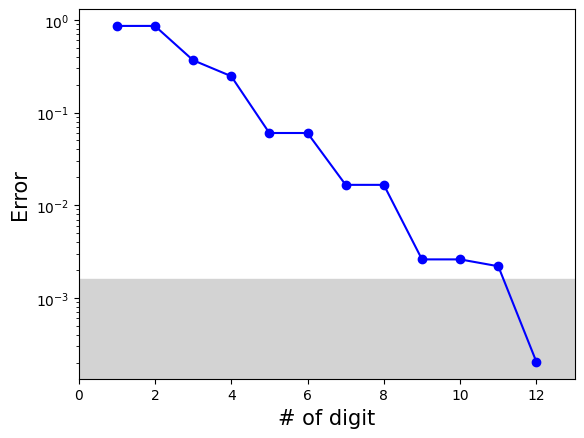

In [10]:
import matplotlib.pyplot as plt
## plotting the result
result_array = np.array(result_list)
plt.xlabel("# of digit", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.semilogy(result_array[:,0], np.abs(result_array[:,1] - e_trotter), "bo-")
plt.xlim(0,13)
plt.fill_between([0,13], 1.6e-3, color = "lightgrey") ## fill the chemical accuracy region

As expected, we finally reached chemical accuracy at `n_itter = 12`.

One thing to note here is that the sample code introduced here uses the (controlled) time evolution operator $\Lambda \left( \left( U_{\textrm{Trot}}^{(N)} \right)^{2^k} \right)$ whose depth grows exponentially with respect to $t$. That is, exponentially more gates must be used to improve accuracy. Here, we introduced a method based on a simple Trotter decomposition, there have been many studies using other methods to efficiently implement the time evolution operator. Interested readers are referred to references [4][5][6].

#### 5. Iterative Phase estimation with QURI Parts Sampler

The above implementation uses a simulator that evaluates the probability of the measurement outcome deterministically. However, this is not possible on real devices. Thus, we slightly change the function to use a sampler instead of a simulator. For each number of iterations, we repeat the algorithm 100 times and pick the phase the shows up with the most number of times as the estimated phase.

In [11]:
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler
from quri_parts.core.sampling import Sampler


sampler = create_qulacs_vector_sampler()

def iterative_phase_estimation_sampler(
    g_list: list[float],
    tau: float,
    n_itter: int,
    init_state: GeneralCircuitQuantumState,
    n_trotter_step=1,
    kickback_phase=0.0,
    sampler: Sampler=sampler
) -> float:
    for k in reversed(range(1, n_itter+1)): ## run from n_itter to 1
        circuit = IQPE_circuit(
            np.array(g_list).real,
            tau,
            kickback_phase,
            k,
            n_trotter_step=n_trotter_step
        )
        
        ## execute circuit
        psi = init_state.with_gates_applied(circuit)
        kth_digit = next(iter(sampler(psi.circuit, 1))) >> 2
        
        # update kickback phase
        kickback_phase = 0.5 * kickback_phase + np.pi * 0.5 * kth_digit
    
    return 2 * kickback_phase

In [12]:
from collections import Counter

n_elec_conf_qubit = 2
n_ancilla = 1
n_qubits = n_elec_conf_qubit + n_ancilla

g_list = [
    reduced_hamiltonian[pauli_label("Z0")],
    reduced_hamiltonian[pauli_label("Y0 Y1")],
    reduced_hamiltonian[pauli_label("Z1")],
    reduced_hamiltonian[pauli_label("Y0 Y1")],
]


def run_qpe_with_sampler(n_iter: int, repeat: int) -> float:
    hf_state = bk_state_mapper([0, 1])
    tau = 0.640
    results = []
    for _ in range(repeat):
        iqpe_phase = iterative_phase_estimation_sampler(g_list, tau, n_iter, hf_state, n_trotter_step=1, kickback_phase=0)
        results.append(np.round(- iqpe_phase/tau, 8))

    times = 0
    for phase, t in Counter(results).items():
        if t > times:
            times = t
            best = phase

    return best

In [13]:
sampler_result_list = []
for n_iter in range(1, 12+1): # precission in digit
    e_iqpe = run_qpe_with_sampler(n_iter, 100)
    print(f"n_itter={n_iter:2d}, e_iqpe={e_iqpe:10f}, error={np.abs(e_iqpe-e_trotter):.5e}")
    sampler_result_list.append([n_iter, e_iqpe])

n_itter= 1, e_iqpe= -0.000000, error=8.60264e-01
n_itter= 2, e_iqpe= -0.000000, error=8.60264e-01
n_itter= 3, e_iqpe= -1.227185, error=3.66921e-01
n_itter= 4, e_iqpe= -0.613592, error=2.46672e-01
n_itter= 5, e_iqpe= -0.920388, error=6.01246e-02
n_itter= 6, e_iqpe= -0.920388, error=6.01246e-02
n_itter= 7, e_iqpe= -0.843689, error=1.65744e-02
n_itter= 8, e_iqpe= -0.843689, error=1.65744e-02
n_itter= 9, e_iqpe= -0.862864, error=2.60033e-03
n_itter=10, e_iqpe= -0.862864, error=2.60033e-03
n_itter=11, e_iqpe= -0.858070, error=2.19336e-03
n_itter=12, e_iqpe= -0.860467, error=2.03493e-04


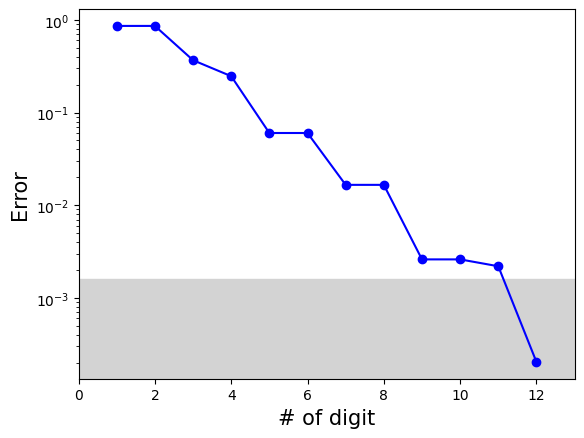

In [14]:
import matplotlib.pyplot as plt
## plotting the result
result_array = np.array(sampler_result_list)
plt.xlabel("# of digit", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.semilogy(result_array[:,0], np.abs(result_array[:,1] - e_trotter), "bo-")
plt.xlim(0,13)
plt.fill_between([0,13], 1.6e-3, color = "lightgrey") ## fill the chemical accuracy region

### Reference
[1] P. J. J. O’Malley _et al._ , “Scalable Quantum Simulation of Molecular Energies“, [PHYSICAL REVIEW X 6, 031007 (2016)](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.6.031007)   
[2] S. Lloyd, “Universal Quantum Simulators“, [Science 273, Issue 5278, pp.1073-1078](https://science.sciencemag.org/content/273/5278/1073)   
[3] M. Nielsen and I. Chuang, “Quantum Computation and Quantum Information“ , Sec. 5.2   
[4] D. W. Berry, G. Ahokas, R. Cleve, B. C. Sanders, “Efficient quantum algorithms for simulating sparse Hamiltonians“,
[Communications in Mathematical Physics 270, 359 (2007)](https://link.springer.com/article/10.1007/s00220-006-0150-x)   
[5] D. W. Berry and  A. M. Childs,  “Black-box Hamiltonian simulation and unitary implementation“, [Quantum Information and Computation 12, 29 (2012)](http://www.rintonpress.com/journals/qiconline.html#v12n12)   
[6] D. W. Berry, A. M. Childs, R. Cleve, R. Kothari, and R. D. Somma,  “Simulating Hamiltonian dynamics with a truncated Taylor series“, 
[Phys. Rev. Lett. 114, 090502 (2015)](https://dx.doi.org/10.1103/PhysRevLett.114.090502)